by : Katie Rink, Yihan Zhou

## Preparation and Overview

### Business Case
Whenever a person goes to apply for someone to trust them to be good for a large sum of money, such as a mortgage or a line of credit. To determine said reliability, the lender utilizes the credit score, which is dependent on a variety of factors. As the customer seeking a loan, it is important for them to understand what factors allow them to maximize their credit score. </br> 

Within the public domain of Kaggle, there is a large database that holds information on the known factors associated with credit score, and the final given credit score. It contains over 100000 datapoints, and it utilizes both numeric and categorical data. </br> 

We hope to dive into an analysis of the factors listed and create some simple visualizations to explain how their credit score is developed, and what trends good credit scores follow. Thus, the main prediction task here is to classify the credit score of a customer based on their credit-related attributes. This is of direct interest to third parties (such as companies) that want to a tool to reduce the efforts to classify their customer's credit scores. Consequently, for the prediction algorithm to be considered useful, it needs to be fairly accurate when applied to our test data in predicting the credit scores of the test customers. </br> 

More specifically, we would like to be able to have around or higher than an 80% accuracy, due to that being the generally considered average value of prediction from sites that perform similar functions. Additionally, we would prefer to focus on minimize false positives, especially with higher credit scores because that would mean we are falsely stating a person has a high credit score, when they do not. Since our goal is to aid consumers in maximizing their credit score, it is better to have customers assume and attempt to put more work into their credit score, rather than feel falsely secure and do nothing to improve their credit score.</br>

Overally, we are looking for what factors most affect credit score, and the general trends credit scores tend to follow.

Data Set : Credit Card Classification - https://www.kaggle.com/datasets/parisrohan/credit-score-classification?select=train.csv

### Prepare Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as SKLogisticRegression
from sklearn.metrics import accuracy_score
from numpy.linalg import pinv
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
import time

data = pd.read_csv("../Data/credit_score/test.csv")

#### Data Description

First, we want to look at what information we are looking at. Looking at the information provided below. We can see that Name, Monthly_Inhand_Salary,Type_of_Loan, Num_of_Delayed_Payment, Num_Credit_Inquiries, Credit_History_Age, and Amount_invested_monthly all contain null values. Therefore, when we move to clean the data, the first thing we need to do is replace or remove all null values, so we can gather accurate conclusions from our analysis

In [2]:
data.info()
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 27 columns):
ID                          50000 non-null object
Customer_ID                 50000 non-null object
Month                       50000 non-null object
Name                        44985 non-null object
Age                         50000 non-null object
SSN                         50000 non-null object
Occupation                  50000 non-null object
Annual_Income               50000 non-null object
Monthly_Inhand_Salary       42502 non-null float64
Num_Bank_Accounts           50000 non-null int64
Num_Credit_Card             50000 non-null int64
Interest_Rate               50000 non-null int64
Num_of_Loan                 50000 non-null object
Type_of_Loan                44296 non-null object
Delay_from_due_date         50000 non-null int64
Num_of_Delayed_Payment      46502 non-null object
Changed_Credit_Limit        50000 non-null object
Num_Credit_Inquiries        48965 non-null f

(50000, 27)

In [3]:
data.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,42502.000000,50000.000000,50000.000000,50000.000000,50000.000000,48965.000000,50000.000000,50000.000000
mean,4182.004291,16.838260,22.921480,68.772640,21.052640,30.080200,32.279581,1491.304305
std,3174.109304,116.396848,129.314804,451.602363,14.860397,196.984121,5.106238,8595.647887
min,303.645417,-1.000000,0.000000,1.000000,-5.000000,0.000000,20.509652,0.000000
25%,1625.188333,3.000000,4.000000,8.000000,10.000000,4.000000,28.061040,32.222388
50%,3086.305000,6.000000,5.000000,13.000000,18.000000,7.000000,32.280390,74.733349
75%,5934.189094,7.000000,7.000000,20.000000,28.000000,10.000000,36.468591,176.157491
max,15204.633333,1798.000000,1499.000000,5799.000000,67.000000,2593.000000,48.540663,82398.000000


In [4]:
data.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.26670208571772
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.44400385378196
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.67544623342997
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.82687322383634
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.2984336755923


#### Data Cleaning

Now that we have a grasp on what each data point's type is, and we know which values contain null values, we can begin to clean it. First we visualize our initial data, it's characteristics, and it's general layout, so we can compare once it is done. 

In [5]:
data.describe(include='object').T

,count,unique,top,freq
ID,50000,50000,0xa60c,1
Customer_ID,50000,12500,CUS_0x4ed5,4
Month,50000,4,October,12500
Name,44985,10139,Stevex,22
Age,50000,976,39,1493
SSN,50000,12501,#F%$D@*&8,2828
Occupation,50000,16,_______,3438
Annual_Income,50000,16121,9141.63,8
Num_of_Loan,50000,263,2,7173
Type_of_Loan,44296,6260,Not Specified,704


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2aaad7065128>,
      dtype=object)

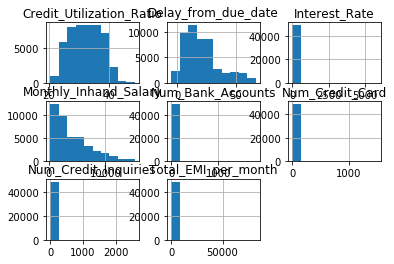

In [6]:
data.hist()

Replace Null Values

In [7]:
data.isnull().any()

ID                          False
Customer_ID                 False
Month                       False
Name                         True
Age                         False
SSN                         False
Occupation                  False
Annual_Income               False
Monthly_Inhand_Salary        True
Num_Bank_Accounts           False
Num_Credit_Card             False
Interest_Rate               False
Num_of_Loan                 False
Type_of_Loan                 True
Delay_from_due_date         False
Num_of_Delayed_Payment       True
Changed_Credit_Limit        False
Num_Credit_Inquiries         True
Credit_Mix                  False
Outstanding_Debt            False
Credit_Utilization_Ratio    False
Credit_History_Age           True
Payment_of_Min_Amount       False
Total_EMI_per_month         False
Amount_invested_monthly      True
Payment_Behaviour           False
Monthly_Balance              True
dtype: bool

Name, Customer_ID, and SSN have no real effect on our prediciton algorithm as we train it, so there is no reason for it to be left in the dataset

In [8]:
data.drop('Name', axis=1, inplace=True)
data.drop('Customer_ID', axis=1, inplace=True)
data.drop('SSN', axis=1, inplace=True)

We also have null values in Monthly_Inhand_Salary, which we can fill with the mean to maintain our distribution.

In [9]:
#Determine the original number of values
print('Total null values in Monthly_Inhand_Salary column: ', data.Monthly_Inhand_Salary.isnull().sum(), '\n')
print('Total unique values in Monthly_Inhand_Salary column: ', data.Monthly_Inhand_Salary.nunique(), '\n')

#Find average value for Monthly Inhand Salary
mean = data['Monthly_Inhand_Salary'].mean()
print('Mean value of Monthly_Inhand_Salary column :', mean)

#replace null values with mean
data['Monthly_Inhand_Salary']=data['Monthly_Inhand_Salary'].replace(np.nan, mean).astype(float)
print('Total null values in Monthly_Inhand_Salary column: ', data.Monthly_Inhand_Salary.isnull().sum(),)

Total null values in Monthly_Inhand_Salary column:  7498 

Total unique values in Monthly_Inhand_Salary column:  12793 

Mean value of Monthly_Inhand_Salary column : 4182.004291203503
Total null values in Monthly_Inhand_Salary column:  0


We also have null values in Type_of_Loan, which we will impute with a generic name, so we can still grasp the distribution even if there isn't a type that the loan falls into. 

In [10]:
print('Total null values in Type_of_Loan column: ', data.Type_of_Loan.isnull().sum(), '\n')
print('Total unique values in Type_of_Loan column: ', data.Type_of_Loan.nunique(), '\n')
data.Type_of_Loan.unique()

Total null values in Type_of_Loan column:  5704 

Total unique values in Type_of_Loan column:  6260 



array(['Auto Loan, Credit-Builder Loan, Personal Loan, and Home Equity Loan',
       'Credit-Builder Loan', 'Auto Loan, Auto Loan, and Not Specified',
       ..., 'Home Equity Loan, Auto Loan, Auto Loan, and Auto Loan',
       'Payday Loan, Student Loan, Mortgage Loan, and Not Specified',
       'Personal Loan, Auto Loan, Mortgage Loan, Student Loan, and Student Loan'],
      dtype=object)

In [11]:
data['Type_of_Loan']=data['Type_of_Loan'].replace(np.nan, 'Generic')
print('Total null values in Type_of_Loan column: ', data.Type_of_Loan.isnull().sum(),)

Total null values in Type_of_Loan column:  0


There are null and non-numeric in Num_of_Delayed_Payment, so we want to replace all nulls with 0 and remove any non-numeric values. That way, we can assume that if the data was not input, it was not relavent, so we can assume it was 0. 

In [12]:
print('Total null values in Num_of_Delayed_Payment column: ', data.Num_of_Delayed_Payment.isnull().sum(), '\n')
print('Total unique values in Num_of_Delayed_Payment column: ', data.Num_of_Delayed_Payment.nunique(), '\n')

Total null values in Num_of_Delayed_Payment column:  3498 

Total unique values in Num_of_Delayed_Payment column:  443 



In [13]:
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].str.extract(r'(\d+)')
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].fillna(0)
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].astype(int)
print('Total null values in Num_of_Delayed_Payment column: ', data.Num_of_Delayed_Payment.isnull().sum())

Total null values in Num_of_Delayed_Payment column:  0


For the remaining values, it can be generally assumed that if no value was put in, it was because it was not relevant, from which we can assume that it generally means the answer is 0. Additionally, any values we would be unable to compute should be removed

In [14]:
data['Num_Credit_Inquiries']  = data['Num_Credit_Inquiries'].fillna(0)
data['Amount_invested_monthly']=data['Amount_invested_monthly'].replace('__10000__', 0).astype(float)
data['Amount_invested_monthly'] = data['Amount_invested_monthly'].replace('_', '').astype(float)
data['Amount_invested_monthly'] = data['Amount_invested_monthly'].fillna(0)
data['Amount_invested_monthly'].isnull().sum()
data['Monthly_Balance'] = data['Monthly_Balance'].fillna(0)
data['Monthly_Balance']=data['Monthly_Balance'].replace('__-333333333333333333333333333__', 0).astype(float)
data['Age'] = data['Age'].str.extract('(\d+)', expand=False).astype(int)

Removing any outliers from our set, so that our data isn't skewed as we try and train out dataset

In [15]:
#Determine outliers
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
#Remove outliers
data = data[~((data < (Q1 - 1.5*IQR)) | (data > (Q3 + 1.5*IQR))).any(axis = 1)]
data = data[(data['Num_Bank_Accounts'] >= 0)]

For all the remaining values, it is important to be able to remove incomputable values from the dataset, so we can correctly cast them to the right values. 

In [16]:
print('Annual Income Unique Values :', data.Annual_Income.unique())
data['Annual_Income'] = data['Annual_Income'].str.extract('(\d*\.\d+|\d+)', expand=False).astype(float)
print('Annual Income Unique Values :', data.Annual_Income.unique())

Annual Income Unique Values : ['19114.12' '34847.84' '30689.89' ... '16680.35' '20002.88' '39628.99']
Annual Income Unique Values : [19114.12 34847.84 30689.89 ... 16680.35 20002.88 39628.99]


In [17]:
data['Num_of_Loan'] = data['Num_of_Loan'].str.extract('(\d*\.\d+|\d+)', expand=False)
data['Num_of_Loan'] = data['Num_of_Loan'].astype(int)

In [18]:
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].str.extract('(\d*\.\d+|\d+)', expand=False).astype(float)
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].fillna(0)

In [19]:
data['Outstanding_Debt'] = data['Outstanding_Debt'].str.extract('(\d*\.\d+|\d+)', expand=False).astype(float)

Now that we have completed our cleaning, we must revisualize the data. Firstly, we should ensure that all values have become normalized and computable. We can also see our distribution remains fairly similar, without many of the outliers. 

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33668 entries, 1 to 49999
Data columns (total 24 columns):
ID                          33668 non-null object
Month                       33668 non-null object
Age                         33668 non-null int64
Occupation                  33668 non-null object
Annual_Income               33668 non-null float64
Monthly_Inhand_Salary       33668 non-null float64
Num_Bank_Accounts           33668 non-null int64
Num_Credit_Card             33668 non-null int64
Interest_Rate               33668 non-null int64
Num_of_Loan                 33668 non-null int64
Type_of_Loan                33668 non-null object
Delay_from_due_date         33668 non-null int64
Num_of_Delayed_Payment      33668 non-null int64
Changed_Credit_Limit        33668 non-null float64
Num_Credit_Inquiries        33668 non-null float64
Credit_Mix                  33668 non-null object
Outstanding_Debt            33668 non-null float64
Credit_Utilization_Ratio    33668 non-null 

In [21]:
data.isnull().any()

ID                          False
Month                       False
Age                         False
Occupation                  False
Annual_Income               False
Monthly_Inhand_Salary       False
Num_Bank_Accounts           False
Num_Credit_Card             False
Interest_Rate               False
Num_of_Loan                 False
Type_of_Loan                False
Delay_from_due_date         False
Num_of_Delayed_Payment      False
Changed_Credit_Limit        False
Num_Credit_Inquiries        False
Credit_Mix                  False
Outstanding_Debt            False
Credit_Utilization_Ratio    False
Credit_History_Age           True
Payment_of_Min_Amount       False
Total_EMI_per_month         False
Amount_invested_monthly     False
Payment_Behaviour           False
Monthly_Balance             False
dtype: bool

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x2aab1c817e48>,
      dtype=object)

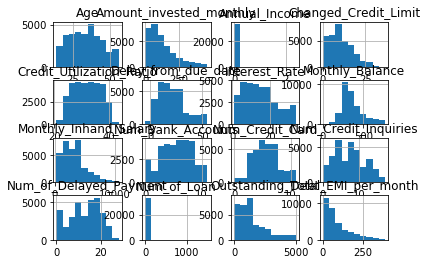

In [22]:
data.hist()

There are a select few more issues to account for. We must remove all illegal characters, so that we can efficiently run operations on everything. We must also convert our results, Credit Mix, into increasing integers to represent their type. We must also make the age numeric, so that our algorithm can process it correctly.

In [23]:
#remove remaining illegal values
#Replace Invalid Values
data =data.replace(r'[^\w\s.]|_|-', '', regex=True) 
#Replace all blank strings will null to be dropped
data.replace('', np.nan, inplace=True)

In [24]:
#Converting the unique credit mix values from Bad, Standard, and Good to 1, 2, and 3
print(data['Credit_Mix'].value_counts(dropna=False))
data = data.replace(['Bad', 'Standard', 'Good'], [1, 2, 3])
data['Credit_Mix'] = data[['Credit_Mix']].apply(pd.to_numeric)

Standard    13211
Good         7304
NaN          6581
Bad          6572
Name: Credit_Mix, dtype: int64


In [25]:
#Convert Age to a numeric value
print(data['Credit_History_Age'].value_counts(dropna=False))
data['Credit_History_Age'] = data['Credit_History_Age'].str[:2]
data['Credit_History_Age'] = data[['Credit_History_Age']].apply(pd.to_numeric)
data['Credit_History_Age'] = data['Credit_History_Age'].fillna(0) 

NaN                       3010
18 Years and 1 Months      182
16 Years and 1 Months      176
18 Years and 6 Months      176
20 Years and 1 Months      174
                          ... 
1 Years and 4 Months        16
33 Years and 11 Months      13
34 Years and 0 Months       13
0 Years and 11 Months        8
0 Years and 10 Months        7
Name: Credit_History_Age, Length: 400, dtype: int64


Finally, we must consider the methods with which our algorithm will interpret our data to be classified. In order to all sklearn to understand the input, we much hot-code all our values so that their is no precedience placed on any category, but so that they are represented in a simple type. Then we must ensure that all out values are of type int so that sklearn can process them. 

In [26]:
#One hot encode categories
def one_hot(array):
    unique, inverse = np.unique(array, return_inverse=True)
    onehot = np.eye(unique.shape[0])[inverse]
    return onehot

data['Occupation'] = data['Occupation'].fillna('None') 

data['Month'] = one_hot(np.array(data['Month']))
data['Occupation'] = one_hot(np.array(data['Occupation']))
data['Payment_Behaviour'] = one_hot(np.array(data['Payment_Behaviour']))
data['Payment_of_Min_Amount'] = one_hot(np.array(data['Payment_of_Min_Amount']))

In [27]:
#Convert all numberic values to type int
data['ID'] = data['ID'].apply(lambda x: int(x, 16))
data['Age'] = data['Age'].astype(int)
data['Annual_Income'] = data['Annual_Income'].astype(int)
data['Monthly_Inhand_Salary'] = data['Monthly_Inhand_Salary'].astype(int)
data['Num_Bank_Accounts'] = data['Num_Bank_Accounts'].astype(int)
data['Num_Credit_Card'] = data['Num_Credit_Card'].astype(int)
data['Interest_Rate'] = data['Interest_Rate'].astype(int)
data['Num_of_Loan'] = data['Num_of_Loan'].astype(int)
data['Delay_from_due_date'] = data['Delay_from_due_date'].astype(int)
data['Num_of_Delayed_Payment'] = data['Num_of_Delayed_Payment'].astype(int)
data['Changed_Credit_Limit'] = data['Changed_Credit_Limit'].astype(int)
data['Outstanding_Debt'] = data['Outstanding_Debt'].astype(int)
data['Credit_Utilization_Ratio'] = data['Credit_Utilization_Ratio'].astype(int)
data['Credit_History_Age'] = data['Credit_History_Age'].astype(int)
data['Total_EMI_per_month'] = data['Total_EMI_per_month'].astype(int)
data['Amount_invested_monthly'] = data['Amount_invested_monthly'].astype(int)
data['Monthly_Balance'] = data['Monthly_Balance'].astype(int)

In [28]:
#drop all rows that have any NaN values
data = data.dropna()

#reset index of DataFrame
data = data.reset_index(drop=True)

### Training vs Testing
Now that we had a clean data set, we needed to break it into testing and training datasets to be able to run the classification algorithm on. We split are values into a data matrix of all the dependent variables we wanted to test against, and a numpy array of the credit score as our independent result varibale. To test, we utalized a simple sample prediction. From our tests of each split and it's accuracy, we can see that a 40-60 split would yeild the highest accuracy. 

In [29]:
# Creating our data matrix (X) and our target variable (y) that we will work on from the dataframe we have
X = data[['Age', 'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance']].to_numpy()
#y = data[['Credit_Score']].to_numpy()
y = data.Credit_Mix.to_numpy()
print("The shape of the data matrix: " + str(X.shape))
print("The shape of the target variable: " + str(y.shape))

The shape of the data matrix: (27087, 20)
The shape of the target variable: (27087,)


In [30]:
#Different possible splits
splits = [0.1, 0.2, 0.3, 0.4, .5]
split_res = pd.DataFrame(columns=['Size', 'Accuracy'])
for size in splits:
    X_train, X_test, y_train, y_test = train_test_split(X.copy(), y.copy(), test_size=size)
    test_model = SKLogisticRegression () 
    test_model.fit(X_train,y_train)
    yhat = test_model.predict(X_test)
    split_res.loc[len(split_res)] = [size, accuracy_score(y_test,yhat)]

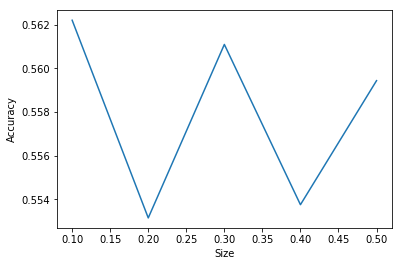

In [31]:
sns.lineplot(data=split_res, x='Size', y='Accuracy')

In [32]:
# Dividing the data into training and testing data using an 80% training and 20% testing split.
X_train, X_test, y_train, y_test = train_test_split(X.copy(), y.copy(), test_size=0.4, random_state=0)
print("The training matrix and target shapes: " + str(X_train.shape)+ ' & ' + str(y_train.shape))
print("The testing matrix and target shapes: " + str(X_test.shape)+ ' & ' + str(y_test.shape))

The training matrix and target shapes: (16252, 20) & (16252,)
The testing matrix and target shapes: (10835, 20) & (10835,)


## Modeling

### Logistic Regression

Beginning with the base of Eric Larson's simple Binary Logisitic Regression class and Logistric Regression class, I was able to implement the basics of training classification. However, to be able to implement more accurate results, I added the ability to use the solvers of : steepest ascent, stochastic gradient ascent, and Newton's method. I also allowed regularization to be selected, as well as an associated cost. I chose an optimized iterations based on the amount of iterations it would generally need to be successful. Ideally we could have tested it, but that would cause our computations to take too much time. So I went with a more intuitve route. 


**Steepest Ascent :** maximize a multivariable function over x through by following the largest slope and taking steps until the minimum is found


**Stochastic Gradient Ascent :** Finds the gradient of a single random choice rather than the entire sum


**Newton's Method :** Finds the point of least function values through by utilizing a Hessian Matrix, which is the second-order partial derivated of a function 

In [33]:
import numpy as np
from scipy.special import expit

class BinaryLogisticRegression:
    # private:
    def __init__(self, eta = 0.01, iterations=20, optimization = 'sa', c = 0, reg = 'none'):
        self.eta = eta
        self.iters = iterations
        # internally we will store the weights as self.w_ to keep with sklearn conventions
        #Set values based on custom selection
        self.optim = optimization
        self.c = c
        self.reg = reg
        
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'Binary Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained Binary Logistic Regression Object'
    
    # convenience, private and static:
    @staticmethod
    def _sigmoid(theta):
        return expit(theta) #1/(1+np.exp(-theta))
    
    #NEW - used to ass a bias term
    @staticmethod
    def _add_bias(X):
        return np.hstack((np.ones((X.shape[0],1)),X)) # add bias term
    
    # public:
    def predict_proba(self, X, add_bias=True):
        # add bias term if requested
        Xb = self._add_bias(X) if add_bias else X
        return self._sigmoid(Xb @ self.w_) # return the probability y=1
    
    def predict(self,X):
        return (self.predict_proba(X)>0.5) #return the actual prediction
    
    #NEW - add gradient for each type of solver algorithm
    def _get_gradient(self, X, y) :
        gradient = np.zeros(self.w_.shape) # set gradient to zero
        
        if self.optim == 'steepest' :
            # get y difference
            ydiff = y-self.predict_proba(X,add_bias=False).ravel()
            # make ydiff a column vector and multiply through
            gradient = np.mean(X * ydiff[:,np.newaxis], axis=0)
            # cause gradient to reshape to data
            gradient = gradient.reshape(self.w_.shape)
            # regularize the data
            gradient[1:] += self._regularize()
            
            return gradient
        
        if self.optim == 'stochastic' :
            #random instance selection
            idx = int(np.random.rand()*len(y))
            # get y difference
            ydiff = y[idx]-self.predict_proba(X[idx],add_bias=False)
            # make ydiff a column vector
            ydiff_vector = ydiff[:,np.newaxis]
            #multipy through all values in data
            gradient = X[idx] * ydiff_vector 
            # reshape to data accordingly
            gradient = gradient.reshape(self.w_.shape)
            # regularize 
            gradient[1:] += self._regularize()
            
            return gradient
        
        if self.optim == 'newton' :
            # get sigmoid value for all classes
            g = self.predict_proba(X,add_bias=False).ravel()
             # calculate the true hessian
            hessian = X.T @ np.diag(g*(1-g)) @ X - 2 * self.c
            # get y difference
            ydiff = y-g 
            # make ydiff a column vector
            ydiff_vector = ydiff[:,np.newaxis]
            # multipy through all values in data
            gradient = np.sum(X * ydiff_vector, axis=0)
            # reshape to data accordingly
            gradient = gradient.reshape(self.w_.shape)
            # regularize 
            gradient[1:] +=  self._regularize()
            
            #return hessian multiplied with gradient
            return pinv(hessian) @ gradient
        
    #General regularizations applied given each type of value to prevent over and underfitting
    #L1 represents LASSO regression - adds absolute value of magnitude
    #L2 represents ridge regression - adds squared magnitude
    def _regularize(self) :
        if self.reg == 'none':
            return self.w_[1:] * self.c
        elif self.reg == 'l1':
            return np.sign(self.w_[1:]) * self.c
        elif self.reg == 'l2':
            return -2 * self.w_[1:] * self.c
        elif self.reg == 'l1l2':
            return -2 * self.w_[1:] + np.sign(self.w_[1:]) * self.c
        
    def fit(self, X, y):
        Xb = self._add_bias(X) # add bias term
        num_samples, num_features = Xb.shape
        
        self.w_ = np.zeros((num_features,1)) # init weight vector to zeros
        
        # for as many as the max iterations
        for _ in range(self.iters):
            gradient = self._get_gradient(Xb,y)
            self.w_ += gradient*self.eta # multiply by learning rate 

In [34]:
class LogisticRegression:
    def __init__(self, eta = 0.01, iterations=20, optimization = 'sa', c = 0.001, reg = 'none'):
        self.eta = eta
        self.iters = iterations
        # internally we will store the weights as self.w_ to keep with sklearn conventions
        #set values based on values sent in
        self.optim = optimization
        self.c = c
        self.reg = reg
    
    def __str__(self):
        if(hasattr(self,'w_')):
            return 'MultiClass Logistic Regression Object with coefficients:\n'+ str(self.w_) # is we have trained the object
        else:
            return 'Untrained MultiClass Logistic Regression Object'
        
    def fit(self,X,y):
        num_samples, num_features = X.shape
        self.unique_ = np.unique(y) # get each unique class value
        num_unique_classes = len(self.unique_)
        self.classifiers_ = [] # will fill this array with binary classifiers
        
        for i,yval in enumerate(self.unique_): # for each unique value
            y_binary = (y==yval) # create a binary problem
            # train the binary classifier for this class with unique passed in variables
            blr = BinaryLogisticRegression(eta=self.eta,
                                                 iterations=self.iters,
                                                 optimization=self.optim,
                                                 c=self.c,
                                                 reg=self.reg)
            blr.fit(X,y_binary)
            # add the trained classifier to the list
            self.classifiers_.append(blr)
            
        # save all the weights into one matrix, separate column for each class
        self.w_ = np.hstack([x.w_ for x in self.classifiers_]).T
        
    def predict_proba(self,X):
        probs = []
        for blr in self.classifiers_:
            probs.append(blr.predict_proba(X)) # get probability for each classifier
        
        return np.hstack(probs) # make into single matrix
    
    def predict(self,X):
        return self.unique_[np.argmax(self.predict_proba(X),axis=1)] # take argmax along row

Upon development, I tested each solver with the below code to ensure they were functioning properly. 

In [ ]:
lr = LogisticRegression(eta=0.0001, iterations=5000, optimization='steepest', c = .5, reg='l1')
lr.fit(X_train,y_train)
yhat = lr.predict(X_test)
print('Accuracy of: ', accuracy_score(y_test,yhat))

lr = LogisticRegression(eta=0.0001, iterations=5000, optimization='stochastic', c = .5, reg='l1')
lr.fit(X_train,y_train)
yhat = lr.predict(X_test)
print('Accuracy of: ', accuracy_score(y_test,yhat))

lr = LogisticRegression(eta=0.0001, iterations=5000, optimization='newton', c = .5, reg='l1')
lr.fit(X_train,y_train)
yhat = lr.predict(X_test)
print('Accuracy of: ', accuracy_score(y_test,yhat))

### Train Classifier
Train your classifier to achieve good generalization performance. That is, adjust the optimization technique and the value of the regularization term(s) "C" to achieve the best performance on your test set. Visualize the performance of the classifier versus the parameters you investigated. Is your method of selecting parameters justified? That is, do you think there is any "data snooping" involved with this method of selecting parameters?
Once we had the basis set out, I had to then apply it to my actual dataset. I tried each of the solver methods at each regularization method with varying costs from 1 to .001. That way I got a wide set of what each different combination could result in. Once I ran each, I recorded the accuracy into a dataframe. 

In [35]:
accuracies = pd.DataFrame(columns =['Cost', 'Regularization', 'Optimization', 'Accuracies'])
c_values = {.001, .01, .1, 1}
reg_values = {'none', 'l1', 'l2', 'l1l2'}
opt_values = {'steepest', 'stochastic', 'newton'}

for optimization in opt_values :
    for regularization in reg_values : 
        for cost in c_values : 
            # steepest and newton calcuate gradient across all samples, so they have lower values
            # steepest uses calculations so it does not need as many iterations to get accuracy 
            # Stochastic only runs on one sample so they need a larger number
            if optimization == 'steepest' :
                iters = 500
            elif optimization == 'stochastic' :
                iters = 1000
            elif optimization == 'newton' :
                iters = 5
            lr = LogisticRegression(iterations=iters, optimization=optimization, c = cost, reg=regularization)
            lr.fit(X_train,y_train)
            yhat = lr.predict(X_test)
            accuracies.loc[len(accuracies)] = [cost, regularization, optimization, accuracy_score(y_test,yhat)]
accuracies

,Cost,Regularization,Optimization,Accuracies
0,0.100,l1,newton,0.910568
1,1.000,l1,newton,0.909460
2,0.010,l1,newton,0.910568
3,0.001,l1,newton,0.910752
4,0.100,l2,newton,0.910568
5,1.000,l2,newton,0.909368
6,0.010,l2,newton,0.910568
7,0.001,l2,newton,0.910752
8,0.100,none,newton,0.910568
9,1.000,none,newton,0.909368


Once I had each accuracy, I compared the different categories against each other to see which options proved to be the most effective. 

With each type of solver, Newton performed significantly above the other two methods. Steepest performed more consistently higher that stochastic, but there both were able to perform at equally high accuracies. 

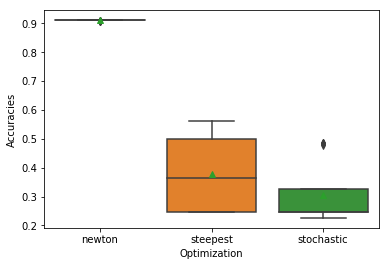

In [36]:
#Graph based on Optimization and Accuracies
sns.boxplot(x = 'Optimization', y = 'Accuracies', data=accuracies, showmeans=True)

The costs tended to cause more effect depending on the type used in conjunction with it. Overall they tended to result in the same average accuracy, but .1 was able to reach slightly higher consistently. 

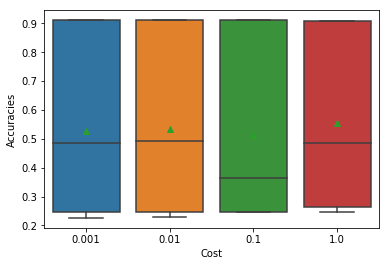

In [37]:
#Graph based on Regularization and Accuracies
sns.boxplot(x = 'Cost', y = 'Accuracies', data=accuracies, showmeans=True)

Regularization followed the same tend as cost because they depended more on the solver being used with it than the actual value itself. The averages maintained the same, but l2 regularization reached lower levels of accuracy than the others. 

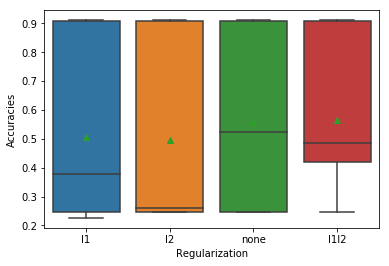

In [38]:
#Graph based on Regularization and Accuracies
sns.boxplot(x = 'Regularization', y = 'Accuracies', data=accuracies, showmeans=True)

### Analyze Performance
In order to compare our custom algorithm to sklearn's logistic regression model, we needed to know what was the optimal model we should run ours against. So I took the accuracies we had previously recorded, and saved the highest one as the one we would test against. Using the same principles as before, we ran our highest accuracy and recorded the time it took. We then further gathered the number of false negatives and false positives to compare against sklearn's. We then repeated the process with sklearn. 

In [39]:
sorted_accuracies = accuracies.sort_values(by='Accuracies')[::-1]
sorted_accuracies = sorted_accuracies.reset_index()

We can see that from our below tests, our custom solver ran with a time of 3 mins and an accuracy of 91%. Alternatively, the sklearn ran with a time of 2.9 seconds and an accuracy of 85%. While our custom algorithm may have held a higher accuracy, it took a significantly longer period of time to run. The amount of time sacraficed to use our solver over sklearn was roughly 300 percent longer, whereas the amount of accuracy sacraficed was only 10 percent. The accuracy of sklearn still remains within our successfulness margin, so it appears to be the better solver. 

In [60]:
%%time
#Get the time and accuracy for our best option
if sorted_accuracies['Optimization'][0] == 'steepest' :
    iters = 500
elif sorted_accuracies['Optimization'][0] == 'stochastic' :
    iters = 1000
elif sorted_accuracies['Optimization'][0] == 'newton' :
    iters = 5
                
lr = LogisticRegression(iterations=iters, optimization=sorted_accuracies['Optimization'][0], c = sorted_accuracies['Cost'][0], reg=sorted_accuracies['Regularization'][0])
lr.fit(X_train,y_train)
yhat = lr.predict(X_test)
print('Accuracy of: ', accuracy_score(y_test,yhat))

Accuracy of:  0.9107521919704661
CPU times: user 3min 29s, sys: 46 s, total: 4min 15s
Wall time: 16.8 s


In [66]:
#Get the number of TP and TN in our test
from sklearn.metrics import multilabel_confusion_matrix

coff_matrix_own_simple = multilabel_confusion_matrix(y_test, yhat)
coff_matrix_own = pd.crosstab(y_test, yhat, rownames=['Actual'], colnames=['Predicted'])
print(coff_matrix_own_simple)
print(coff_matrix_own)

[[[7761  403]
  [ 385 2286]]

 [[4750  828]
  [ 765 4492]]

 [[7563  365]
  [ 446 2461]]]
Predicted   1.0   2.0   3.0
Actual                     
1.0        2286   384     1
2.0         401  4492   364
3.0           2   444  2461


In [67]:
%%time
#Get time and accuracy of sklearn
lr_sk = SKLogisticRegression(solver='liblinear') # all params default

lr_sk.fit(X_train,y_train)
yhat = lr_sk.predict(X_test)
print('Accuracy of: ',accuracy_score(y_test,yhat))

Accuracy of:  0.8526995846792801
CPU times: user 986 ms, sys: 167 ms, total: 1.15 s
Wall time: 861 ms


In [68]:
#Get the number of TP and TN in skylearn
coff_matrix_sklearn_simple = multilabel_confusion_matrix(y_test, yhat)
coff_matrix_sklearn = pd.crosstab(y_test, yhat, rownames=['Actual'], colnames=['Predicted'])
print(coff_matrix_sklearn_simple)
print(coff_matrix_sklearn)

[[[7761  403]
  [ 385 2286]]

 [[4750  828]
  [ 765 4492]]

 [[7563  365]
  [ 446 2461]]]
Predicted   1.0   2.0   3.0
Actual                     
1.0        2286   384     1
2.0         401  4492   364
3.0           2   444  2461


The final factor to consider is which kind of false reports are being prioritized. We prefered to operate under false negatives rather than false positives, so as to avoid false security within our clients. As we can see below, our custom algorithm ____. Alternatively, sklearn _____. 

In [128]:
#create graphable dataframe
total_true_positives_own = 0
total_false_positives_own = 0
total_true_negatives_own = 0
total_false_negatives_own = 0

for i in range(3) :
    total_true_positives_own += coff_matrix_own_simple[i][0][0]
    total_false_positives_own += coff_matrix_own_simple[i][1][0]
    total_true_negatives_own += coff_matrix_own_simple[i][1][1]
    total_false_negatives_own += coff_matrix_own_simple[i][0][1]

average_coff_own = pd.DataFrame({'Positives':[total_true_positives/3, total_false_positives/3], 'Negatives':[total_true_negatives/3, total_false_negatives/3]})

total_true_positives_sklearn = 0
total_false_positives_sklearn = 0
total_true_negatives_sklearn = 0
total_false_negatives_sklearn = 0

for i in range(3) :
    total_true_positives_sklearn += coff_matrix_sklearn_simple[i][0][0]
    total_false_positives_sklearn += coff_matrix_sklearn_simple[i][1][0]
    total_true_negatives_sklearn += coff_matrix_sklearn_simple[i][1][1]
    total_false_negatives_sklearn += coff_matrix_sklearn_simple[i][0][1]

As we can see from our below confusion matrix, both methods tend to carry equally weighted classifications. Therefore there tends to be relatively similar rations of categories being predicted incorrectly. 

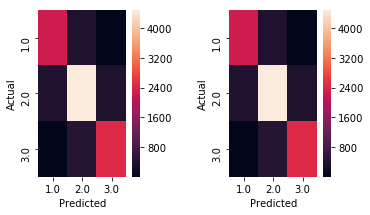

In [129]:
#Graph our confusion matrixes
fig, (ax1, ax2) = plt.subplots(1, 2)
plt.tight_layout(pad=5.0)
sns.heatmap(coff_matrix_sklearn, ax=ax1)
sns.heatmap(coff_matrix_own, ax=ax2)
plt.show()

Finally, as we can see from the below pie charts. There tend to be very similar breakdowns of true positives, true negatives, false postives, and false negatives. Therefore, it can be concluded that both sklearn and our custom algorithm tend to err in the same general ways, making them relatively equal. Unfortunately, the data is pretty evenly split in both accounts toward false negatives and false positives, which we would have prefered to be more skewed towards false negatives. However, weighting caused our data to become less accurate, so this method remains the best.

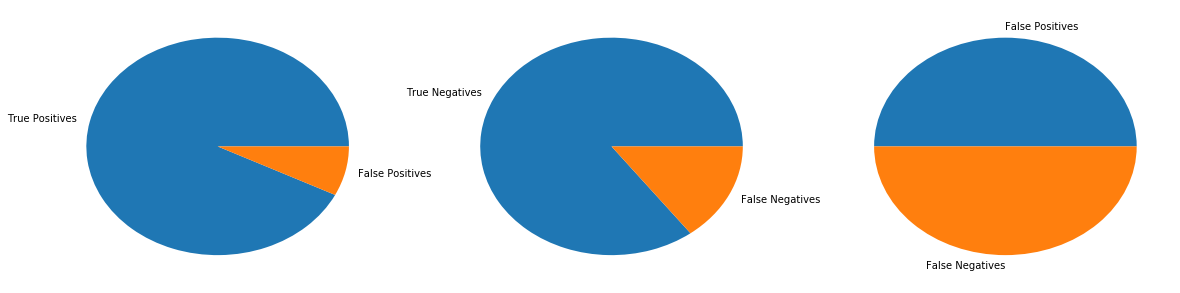

In [152]:
#Graph custom confusion matrix as pie charts
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(20, 5))
gs = GridSpec(1, 3, figure=fig)

axs = []
axs.append( fig.add_subplot(gs[0]) )
axs.append( fig.add_subplot(gs[1]) )
axs.append( fig.add_subplot(gs[2]) )


#Positives for own matrix
list_positives = [total_true_positives_own/3, total_false_positives_own/3]
average_coff_own = pd.DataFrame(list_temp_positives, columns = ['Confusion_Matrix'])
axs[0].pie(average_coff_own['Confusion_Matrix'], labels=['True Positives', 'False Positives'])

#negatives for own matrix
list_negatives = [total_true_negatives_own/3, total_false_positives_own/3]
average_coff_own = pd.DataFrame(list_negatives, columns = ['Confusion_Matrix'])
axs[1].pie(average_coff_own['Confusion_Matrix'], labels=['True Negatives', 'False Negatives'])

#falses for own matrix
list_false = [total_false_positives_own/3, total_false_negatives_own/3]
average_coff_own = pd.DataFrame(list_false, columns = ['Confusion_Matrix'])
axs[2].pie(average_coff_own['Confusion_Matrix'], labels=['False Positives', 'False Negatives'])

plt.show()

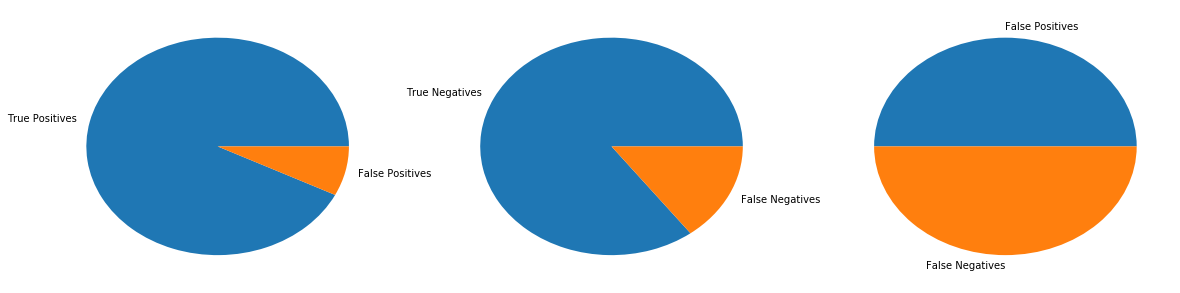

In [153]:
#Graph sklearn confusion matrix as pie charts
from matplotlib.gridspec import GridSpec
fig = plt.figure(figsize=(20, 5))
gs = GridSpec(1, 3, figure=fig)

axs = []
axs.append( fig.add_subplot(gs[0]) )
axs.append( fig.add_subplot(gs[1]) )
axs.append( fig.add_subplot(gs[2]) )


#Positives for sklearn matrix
list_positives = [total_true_positives_sklearn/3, total_false_positives_sklearn/3]
average_coff_sklearn = pd.DataFrame(list_temp_positives, columns = ['Confusion_Matrix'])
axs[0].pie(average_coff_sklearn['Confusion_Matrix'], labels=['True Positives', 'False Positives'])

#negatives for sklearn matrix
list_negatives = [total_true_negatives_sklearn/3, total_false_positives_sklearn/3]
average_coff_sklearn = pd.DataFrame(list_negatives, columns = ['Confusion_Matrix'])
axs[1].pie(average_coff_sklearn['Confusion_Matrix'], labels=['True Negatives', 'False Negatives'])

#falses for sklearn matrix
list_false = [total_false_positives_sklearn/3, total_false_negatives_sklearn/3]
average_coff_sklearn = pd.DataFrame(list_false, columns = ['Confusion_Matrix'])
axs[2].pie(average_coff_sklearn['Confusion_Matrix'], labels=['False Positives', 'False Negatives'])

plt.show()

## Deployment

For accuracy's sake, the newton's method custom algorithm creates the most accurate run. However, it also takes the most time. While our smaller dataset runs fine with the longer method, any fairly large dataset would take hours to be classified using Newton's method. So ultimately that much time is not useful to be spent. It would take far to long to be able to run credit scores and determine an outcome. 


Speedwise, sklearn runs roughly as efficiently as the custom stochastic method, and they are both speedy enough to handle large datasets. However, the amount of accuracy lost with stochastic is great enough that the algorithm would not meet our successful goal. The accuracy would lead us to leading more customers astray than benefitting them. 

To ensure the most efficient and timely program, without sacraficing accuracy, sklearn provides the best option to be able to correctly classify our credit scores. While the accuracy it not fully there, it is able to be run in a more time and memory efficent manner, which makes it much more realistically usable. The major drawback being that false positives and false negatives tend to be equally weighted, which does not meet our success criteria. However, the amounts are still low enough it is not a terrible detriment. 